### Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates really wants to work for the company after training or looking for a new employment, because it helps to reduce the cost and time, as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are from candidates signup and enrollment.

This dataset is also designed to understand, what are the factors that lead a person to leave their current job. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to see if they look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.(High-cardinality refers to columns with values that are very uncommon or unique. High-cardinality column values are typically identification numbers, email addresses, or user names.)
Missing imputation can be a part of your pipeline as well.

### Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

### Inspiration
Predict the probability of a candidate who will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision

## Assigning working directory

In [1]:
import os
os.chdir('C:/Users/Darshan/Desktop/hr_analytics_prediction')

## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

## Importing datasets

In [3]:
df = pd.read_csv('Datasets/aug_train.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df_desc = pd.read_csv('Datasets/description.csv',encoding='cp1252',header=None)

In [6]:
df_desc.index = df_desc.loc[:,0]
df_desc.drop(0,axis=1,inplace=True)

In [7]:
df_desc.head()

,1
0,
enrollee_id,Unique ID for candidate
city,City code
city_ development _index,Developement index of the city (scaled)
gender,Gender of candidate
relevent_experience,Relevant experience of candidate


## Exploratory Data Analysis (EDA)

### Basic Commands

In [8]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [10]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [11]:
df.shape

(19158, 14)

In [12]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [13]:
print('Percentage of null values \n')
for i in df.columns:
    percent = (df[i].isnull().sum()/(df[i].isnull().sum() + df[i].notnull().sum()))*100
    print(f'{i} : {round(percent,2)}')

Percentage of null values 

enrollee_id : 0.0
city : 0.0
city_development_index : 0.0
gender : 23.53
relevent_experience : 0.0
enrolled_university : 2.01
education_level : 2.4
major_discipline : 14.68
experience : 0.34
company_size : 30.99
company_type : 32.05
last_new_job : 2.21
training_hours : 0.0
target : 0.0


## EDA and Feature Engineering

In [14]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [15]:
def t_test(num, cat, data):
    from scipy.stats import ttest_ind
    
    Ho = f'There is no significant impact of {num} on {cat} (No predictability)'
    Ha = f'There is a significant impact of {num} on {cat} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    un1 = data[cat].unique()[0]
    un2 = data[cat].unique()[1]
    
    ind1 = data[data[cat]==un1]
    ind2 = data[data[cat]==un2]
    
    stat, p = ttest_ind(ind1[num], ind2[num])
    print('Test Statistics: ', stat)
    print('p-value: ', p)
    print('\n')
    
    if p>alpha:
        print('Fail to reject Ho, ', Ho)
    else:
        print('Reject Ho, ', Ha)
        
    return p
    

In [16]:
def chi2(x, y, data):
    from scipy.stats import chi2_contingency
    
    Ho = f'There is no significant assosiation between {x} and {y} (No predictability)'
    Ha = f'There is a significant assosiation between {x} and {y} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    ct = pd.crosstab(data[x], data[y])
    chi2, p, dof, ex = chi2_contingency(ct)
    print('chi-square stats: ', chi2)
    print('p-value: ', p)
    print('\n')

    if p>alpha:
        print('Fail to reject null hypothesis, ', Ho)
    else:
        print('Reject null hypothesis, ', Ha)
        
    return p

In [17]:
def find_proportion(col, df):
    for ind, i in enumerate(df[col].value_counts().index):
        print(f'Proportion of {i}: {round(df[col].value_counts()[ind]/len(df[col]) * 100)}%')

In [18]:
p_value = {}

#### target

In [19]:
df.target.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

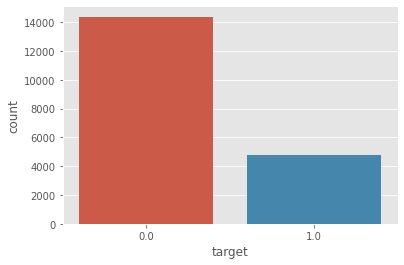

In [20]:
sns.countplot(df.target)

In [21]:
# the target variable is not balanced

#### enrollee_id

In [22]:
df_desc.iloc[0]

1    Unique ID for candidate
Name: enrollee_id , dtype: object

In [23]:
df.enrollee_id.nunique()

19158

In [24]:
df.enrollee_id.count()

19158

In [25]:
print('Min', df.enrollee_id.min())
print('Max', df.enrollee_id.max())

Min 1
Max 33380


In [26]:
# we can remove enrollee_id from the input variables.

drop = ['enrollee_id']

#### city

In [27]:
df_desc.loc['city']

1    City code
Name: city, dtype: object

In [28]:
df.city.unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [29]:
df.city.nunique()

123

In [30]:
# there are too many unique values in city, we can remove this as well

drop.append('city')

#### city_development_index

In [31]:
df_desc.index.values

array(['enrollee_id ', 'city', 'city_ development _index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline ', 'experience', 'company_size', 'company_type',
       'lastnewjob', 'training_hours', 'target'], dtype=object)

In [32]:
df_desc.loc['city_ development _index']

1     Developement index of the city (scaled)
Name: city_ development _index, dtype: object

In [33]:
df.city_development_index.unique()

array([0.92 , 0.776, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926,
       0.827, 0.843, 0.804, 0.855, 0.887, 0.91 , 0.884, 0.924, 0.666,
       0.558, 0.923, 0.794, 0.754, 0.939, 0.55 , 0.865, 0.698, 0.893,
       0.796, 0.866, 0.682, 0.802, 0.579, 0.878, 0.897, 0.949, 0.925,
       0.896, 0.836, 0.693, 0.769, 0.775, 0.903, 0.555, 0.727, 0.64 ,
       0.516, 0.743, 0.899, 0.915, 0.689, 0.895, 0.89 , 0.847, 0.527,
       0.766, 0.738, 0.647, 0.795, 0.74 , 0.701, 0.493, 0.84 , 0.691,
       0.735, 0.742, 0.479, 0.722, 0.921, 0.848, 0.856, 0.898, 0.83 ,
       0.73 , 0.68 , 0.725, 0.556, 0.448, 0.763, 0.745, 0.645, 0.788,
       0.78 , 0.512, 0.739, 0.563, 0.518, 0.824, 0.487, 0.649, 0.781,
       0.625, 0.807, 0.664])

In [34]:
df.city_development_index.nunique()

93

In [35]:
df.city_development_index.describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

Some examples of city development index
![image](descriptive_images/cdi_cities.png)

---
The formula for city development index
![image](descriptive_images/cdi_formula.png)

---
Relationship between city development index and human development index
![image](descriptive_images/cdi_vs_hdi.png)

<AxesSubplot:xlabel='city_development_index'>

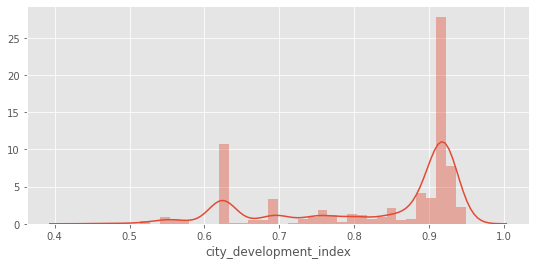

In [36]:
plt.figure(figsize=(9,4))
sns.distplot(df.city_development_index)

In [37]:
# Lets find if there is any impact of city_development_index on target
# Since city_development_index is a continuous variable and, target is a categorical variable
# with only two levels, we can use independent t-test

p_value['city_development_index'] = t_test('city_development_index', 'target', df)

Ho:  There is no significant impact of city_development_index on target (No predictability)
Ha:  There is a significant impact of city_development_index on target (Good predictor)


Test Statistics:  -50.31616259328961
p-value:  0.0


Reject Ho,  There is a significant impact of city_development_index on target (Good predictor)


In [38]:
# So, we can use city_development_index

#### gender

In [39]:
df_desc.loc['gender']

1    Gender of candidate
Name: gender, dtype: object

In [40]:
df.gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

Text(0.5, 1.0, 'Count of gender')

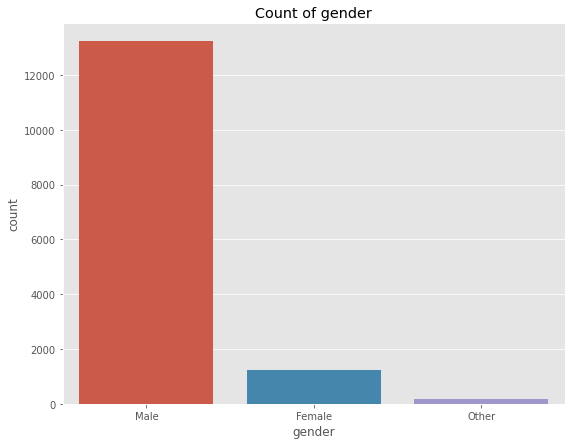

In [41]:
plt.figure(figsize=(9,7))
sns.countplot(df.gender)
plt.title('Count of gender')

In [42]:
df.gender.isnull().sum()

4508

In [43]:
find_proportion('gender', df)

Proportion of Male: 69%
Proportion of Female: 6%
Proportion of Other: 1%


In [44]:
# gender has a large amount of null value as well as uneven proportion
# so we can drop gender column

drop.append('gender')

#### relevent_experience

In [45]:
df_desc.loc['relevent_experience']

1    Relevant experience of candidate
Name: relevent_experience, dtype: object

In [46]:
df.relevent_experience.isnull().sum()

0

In [47]:
df.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

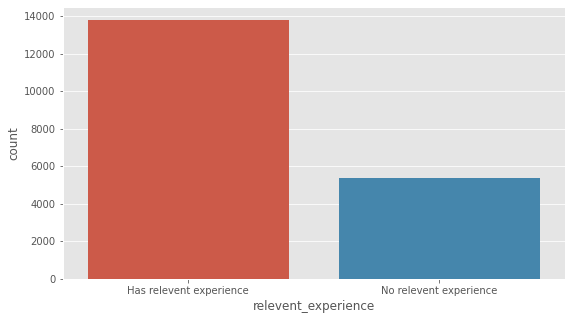

In [48]:
plt.figure(figsize=(9,5))
sns.countplot(df.relevent_experience)

In [49]:
# Lets check if relevent_experience is associated with target

p_value['relevent_experience'] = chi2('relevent_experience', 'target', df)

Ho:  There is no significant assosiation between relevent_experience and target (No predictability)
Ha:  There is a significant assosiation between relevent_experience and target (Good predictor)


chi-square stats:  315.33857672021657
p-value:  1.5006628411178982e-70


Reject null hypothesis,  There is a significant assosiation between relevent_experience and target (Good predictor)


In [50]:
# relevent experience is a good predictor

#### enrolled_university

In [51]:
df_desc.loc['enrolled_university']

1    Type of University course enrolled if any
Name: enrolled_university, dtype: object

In [52]:
df.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [53]:
df.enrolled_university.isnull().sum()

386

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

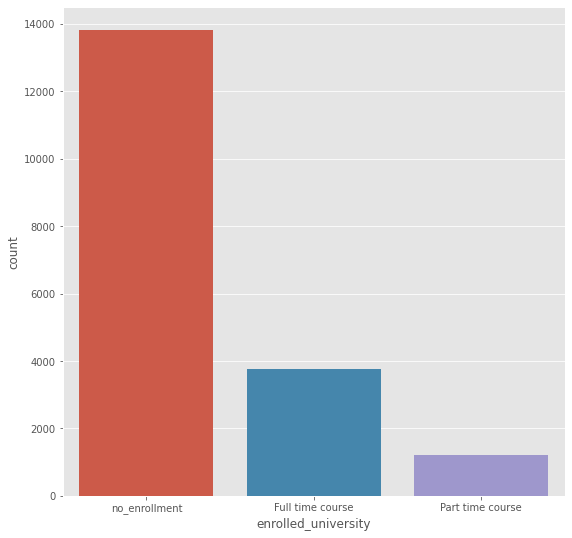

In [54]:
plt.figure(figsize=(9,9))
sns.countplot(df.enrolled_university)

In [55]:
# Lets see if enrolled_university is assosiated with target

p_value['enrolled_university'] = chi2('enrolled_university', 'target', df)

Ho:  There is no significant assosiation between enrolled_university and target (No predictability)
Ha:  There is a significant assosiation between enrolled_university and target (Good predictor)


chi-square stats:  455.16676201857496
p-value:  1.451421175008096e-99


Reject null hypothesis,  There is a significant assosiation between enrolled_university and target (Good predictor)


In [56]:
# enrolled_university is a good predictor of target

#### education_level

In [57]:
df_desc.loc['education_level']

1    Education level of candidate
Name: education_level, dtype: object

In [58]:
df.education_level.unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [59]:
df.education_level.isnull().sum()

460

<AxesSubplot:xlabel='education_level', ylabel='count'>

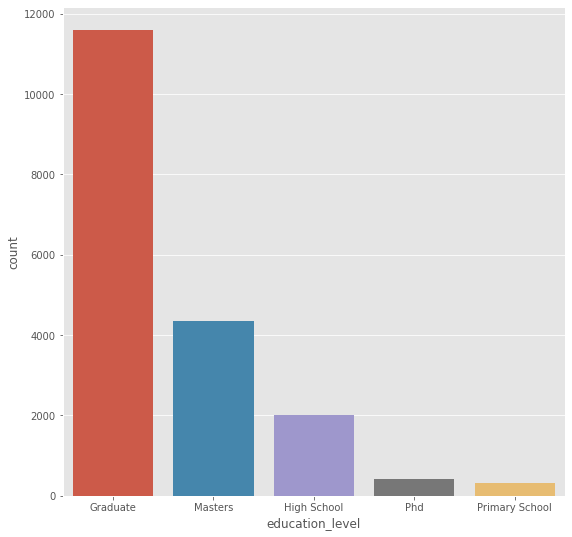

In [60]:
plt.figure(figsize=(9,9))
sns.countplot(df.education_level)

In [61]:
find_proportion('education_level', df)

Proportion of Graduate: 61%
Proportion of Masters: 23%
Proportion of High School: 11%
Proportion of Phd: 2%
Proportion of Primary School: 2%


In [62]:
# Lets club the values 

df = df.replace({'education_level': {
    'Graduate' : 'Lower(PS,HS,G)',
    'High School': 'Lower(PS,HS,G)',
    'Primary School': 'Lower(PS,HS,G)',
    'Masters': 'Higher(M,Phd)',
    'Phd': 'Higher(M,Phd)'
}})

In [63]:
find_proportion('education_level', df)

Proportion of Lower(PS,HS,G): 73%
Proportion of Higher(M,Phd): 25%


In [64]:
# Lets see if there is any assosiation between education_level and target

p_value['education_level'] = chi2('education_level', 'target', df)

Ho:  There is no significant assosiation between education_level and target (No predictability)
Ha:  There is a significant assosiation between education_level and target (Good predictor)


chi-square stats:  59.93251915248253
p-value:  9.816602397972328e-15


Reject null hypothesis,  There is a significant assosiation between education_level and target (Good predictor)


In [65]:
# education_level is a good predictor of target

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

#### major_discipline

In [67]:
df_desc.loc['major_discipline ']

1    Education major discipline of candidate
Name: major_discipline , dtype: object

In [68]:
df.major_discipline.unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [69]:
df.major_discipline.isnull().sum()

2813

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

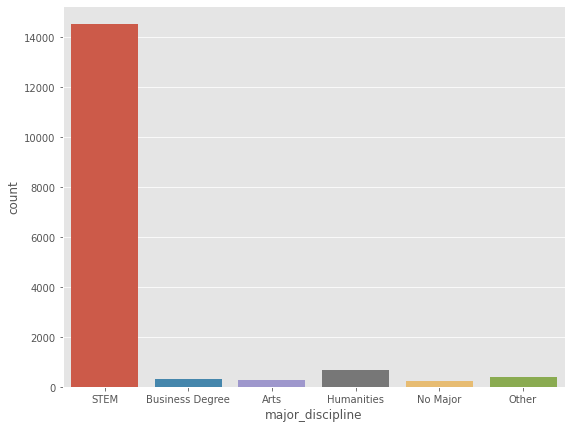

In [70]:
plt.figure(figsize=(9,7))
sns.countplot(df.major_discipline)

In [71]:
df.major_discipline.mode().iloc[0]

'STEM'

In [72]:
find_proportion('major_discipline', df)

Proportion of STEM: 76%
Proportion of Humanities: 3%
Proportion of Other: 2%
Proportion of Business Degree: 2%
Proportion of Arts: 1%
Proportion of No Major: 1%


In [73]:
# There is an uneven proportion of this column, STEM is dominating. we can drop this column

drop.append('major_discipline')

#### experience

In [74]:
df_desc.loc['experience']

1    Candidate total experience in years
Name: experience, dtype: object

In [75]:
df.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [76]:
df.experience.isnull().sum()

65

In [77]:
find_proportion('experience', df)

Proportion of >20: 17%
Proportion of 5: 7%
Proportion of 4: 7%
Proportion of 3: 7%
Proportion of 6: 6%
Proportion of 2: 6%
Proportion of 7: 5%
Proportion of 10: 5%
Proportion of 9: 5%
Proportion of 8: 4%
Proportion of 15: 4%
Proportion of 11: 3%
Proportion of 14: 3%
Proportion of 1: 3%
Proportion of <1: 3%
Proportion of 16: 3%
Proportion of 12: 3%
Proportion of 13: 2%
Proportion of 17: 2%
Proportion of 19: 2%
Proportion of 18: 1%
Proportion of 20: 1%


<AxesSubplot:xlabel='experience', ylabel='count'>

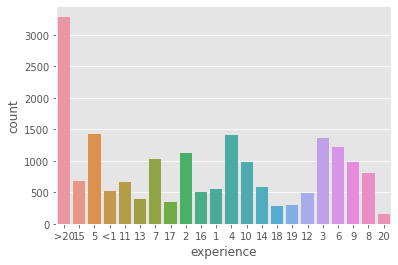

In [78]:
sns.countplot(df.experience)

In [79]:
# Lets club the experience

df = df.replace({'experience': {
    '<1': '<5', '1': '<5', '2': '<5', '3': '<5','4': '<5', '5': '5-10','6': '5-10',
    '7': '5-10','8': '5-10','9': '5-10','10': '5-10',
    '11': '11-15','12': '11-15','13': '11-15','14': '11-15','15': '11-15',
    '16': '16-20','17': '16-20','18': '16-20','19': '16-20','20': '16-20'
}})

<AxesSubplot:xlabel='experience', ylabel='count'>

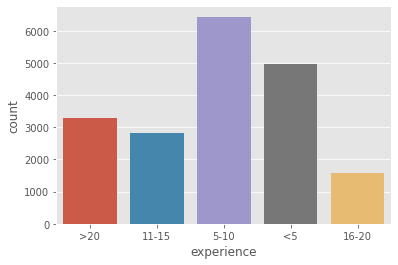

In [80]:
sns.countplot(df.experience)

In [81]:
find_proportion('experience', df)

Proportion of 5-10: 34%
Proportion of <5: 26%
Proportion of >20: 17%
Proportion of 11-15: 15%
Proportion of 16-20: 8%


#### company_size

In [82]:
df_desc.loc['company_size']

1    No of employees in current employer's company
Name: company_size, dtype: object

In [83]:
df.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [84]:
df.company_size.isnull().sum()

5938

In [85]:
df.company_size.isnull().sum()/len(df.company_size) * 100

30.994884643490973

In [86]:
# more than 30 % of the values in company_size is null values, so we can remove the column

drop.append('company_size')

#### company_type

In [87]:
df_desc.loc['company_type']

1    Type of current employer
Name: company_type, dtype: object

In [88]:
df.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

<AxesSubplot:xlabel='company_type', ylabel='count'>

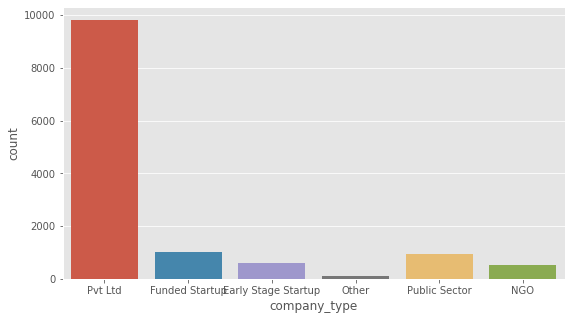

In [89]:
plt.figure(figsize=(9,5))
sns.countplot(df.company_type)

In [90]:
df.company_type.isnull().sum()

6140

In [91]:
df.company_type.isnull().sum()/len(df.company_type) * 100

32.04927445453596

In [92]:
# more than 32 percent of the values in company_type are null values. 

drop.append('company_type')

#### last_new_job

In [93]:
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

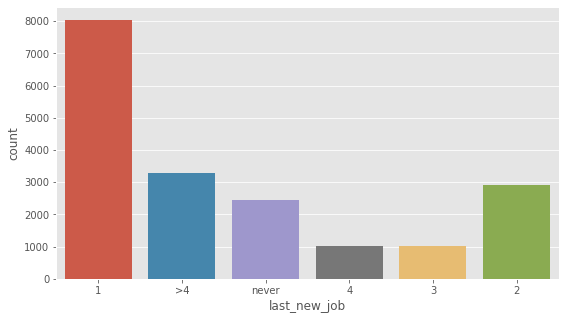

In [94]:
plt.figure(figsize=(9,5))
sns.countplot(df.last_new_job)

In [95]:
df.last_new_job.isnull().sum()

423

In [96]:
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [97]:
df = df.replace({'last_new_job': {
    '1': '1-3',
    '2': '1-3',
    '3': '1-3',
    '4': '>3',
    '>4': '>3'
}})

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

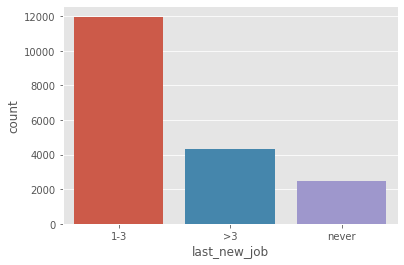

In [98]:
sns.countplot(df.last_new_job)

In [99]:
find_proportion('last_new_job', df)

Proportion of 1-3: 62%
Proportion of >3: 23%
Proportion of never: 13%


In [100]:
# Lets find if there is any assosiation between last_new_job and target

p_value['last_new_job'] = chi2('last_new_job', 'target', df)

Ho:  There is no significant assosiation between last_new_job and target (No predictability)
Ha:  There is a significant assosiation between last_new_job and target (Good predictor)


chi-square stats:  114.62485578504068
p-value:  1.2868526517191186e-25


Reject null hypothesis,  There is a significant assosiation between last_new_job and target (Good predictor)


In [101]:
# last_new_job is a good predictor of target

In [102]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

#### training_hours

In [103]:
df.training_hours.unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

In [104]:
df.training_hours.nunique()

241

In [105]:
df.training_hours.isnull().sum()

0

<AxesSubplot:xlabel='training_hours'>

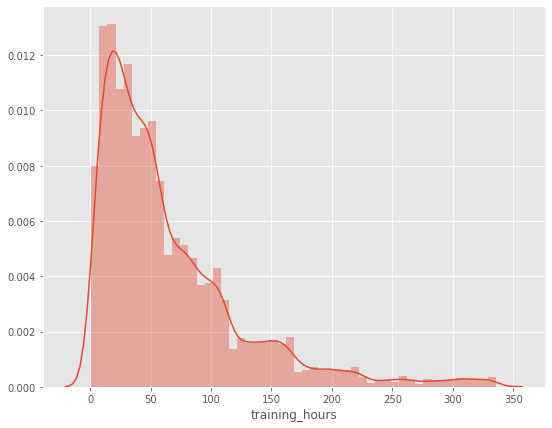

In [106]:
plt.figure(figsize=(9,7))
sns.distplot(df.training_hours)

In [107]:
# Lets see if training_hours has any impact on target

In [108]:
p_value['training_hours'] = t_test('training_hours', 'target', df)

Ho:  There is no significant impact of training_hours on target (No predictability)
Ha:  There is a significant impact of training_hours on target (Good predictor)


Test Statistics:  -2.9870990541592386
p-value:  0.002819949452636266


Reject Ho,  There is a significant impact of training_hours on target (Good predictor)


In [109]:
# training_hours can be a good predictor

#### target

In [110]:
df.target.unique

<bound method Series.unique of 0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64>

<AxesSubplot:xlabel='target', ylabel='count'>

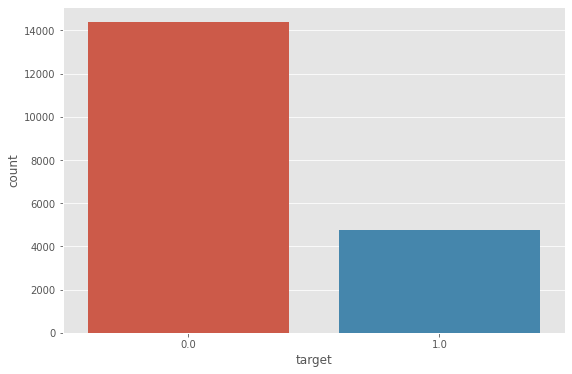

In [111]:
plt.figure(figsize=(9,6))
sns.countplot(df.target)

In [112]:
drop

['enrollee_id',
 'city',
 'gender',
 'major_discipline',
 'company_size',
 'company_type']

In [113]:
# Lets drop these unwanted columns

df_new = df.drop(drop, axis=1)
df_new.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,"Lower(PS,HS,G)",>20,1-3,36,1.0
1,0.776,No relevent experience,no_enrollment,"Lower(PS,HS,G)",11-15,>3,47,0.0
2,0.624,No relevent experience,Full time course,"Lower(PS,HS,G)",5-10,never,83,0.0
3,0.789,No relevent experience,NaN,"Lower(PS,HS,G)",<5,never,52,1.0
4,0.767,Has relevent experience,no_enrollment,"Higher(M,Phd)",>20,>3,8,0.0


## Imputing Null Values

<AxesSubplot:>

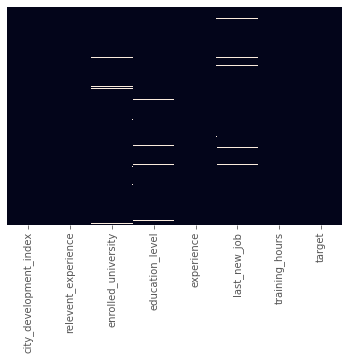

In [114]:
sns.heatmap(df_new.isnull(), cbar=False, yticklabels=False)

In [115]:
df_new.isnull().sum()

city_development_index      0
relevent_experience         0
enrolled_university       386
education_level           460
experience                 65
last_new_job              423
training_hours              0
target                      0
dtype: int64

In [116]:
len(df_new)

19158

In [117]:
df_new.isnull().sum().sum()

1334

In [118]:
# Lets remove all the null values

df_new.dropna(axis=0, inplace=True)

<AxesSubplot:>

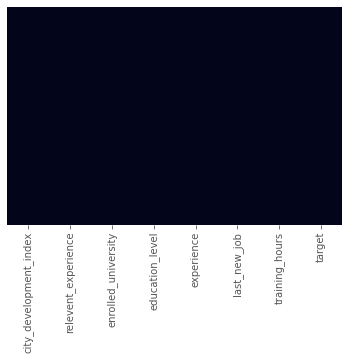

In [119]:
sns.heatmap(df_new.isnull(), cbar=False, yticklabels=False)

In [120]:
df_new.isnull().sum()

city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [121]:
# All the null values are removed

In [122]:
df_new.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,"Lower(PS,HS,G)",>20,1-3,36,1.0
1,0.776,No relevent experience,no_enrollment,"Lower(PS,HS,G)",11-15,>3,47,0.0
2,0.624,No relevent experience,Full time course,"Lower(PS,HS,G)",5-10,never,83,0.0
4,0.767,Has relevent experience,no_enrollment,"Higher(M,Phd)",>20,>3,8,0.0
5,0.764,Has relevent experience,Part time course,"Lower(PS,HS,G)",11-15,1-3,24,1.0


# train_test split

In [123]:
X = df_new.drop('target', axis=1)
y = df_new['target']

In [124]:
X.head(2)

,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours
0,0.920,Has relevent experience,no_enrollment,"Lower(PS,HS,G)",>20,1-3,36
1,0.776,No relevent experience,no_enrollment,"Lower(PS,HS,G)",11-15,>3,47


In [125]:
y.head(2)

0    1.0
1    0.0
Name: target, dtype: float64

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
X_train.shape

(14411, 7)

In [129]:
y_train.shape

(14411,)

In [130]:
X_test.shape

(3603, 7)

In [131]:
y_test.shape

(3603,)

<AxesSubplot:xlabel='target', ylabel='count'>

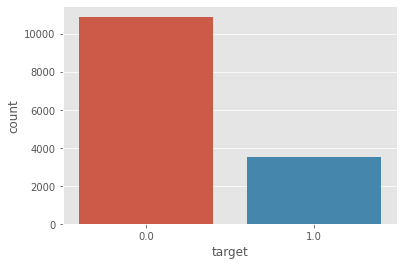

In [132]:
sns.countplot(y_train)

<AxesSubplot:xlabel='target', ylabel='count'>

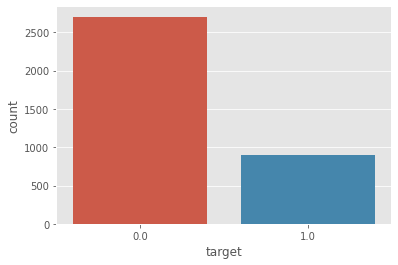

In [133]:
sns.countplot(y_test)

# Scaling and Encoding

In [138]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [139]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes=='O']
cat_cols

['relevent_experience',
 'enrolled_university',
 'education_level',
 'experience',
 'last_new_job']

In [140]:
num_cols = [col for col in X_train.columns if X_train[col].dtypes!='O']
num_cols

['city_development_index', 'training_hours']

In [142]:
len(X_train.columns) == len(cat_cols)+len(num_cols)

True

In [143]:
ct = ColumnTransformer([
    ('scaling', StandardScaler(), num_cols),
    ('encoding', OneHotEncoder(drop='first', sparse=False), cat_cols)
])

In [144]:
X_train_new = ct.fit_transform(X_train)

In [145]:
X_test_new = ct.transform(X_test)

In [156]:
cat_cols_ct = ct.transformers_[1][1].get_feature_names(cat_cols)
cat_cols_ct

array(['relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment',
       'education_level_Lower(PS,HS,G)', 'experience_16-20',
       'experience_5-10', 'experience_<5', 'experience_>20',
       'last_new_job_>3', 'last_new_job_never'], dtype=object)

In [157]:
cat_cols_lst = []
for i in cat_cols_ct:
    cat_cols_lst.append(i)
    
cat_cols_lst

['relevent_experience_No relevent experience',
 'enrolled_university_Part time course',
 'enrolled_university_no_enrollment',
 'education_level_Lower(PS,HS,G)',
 'experience_16-20',
 'experience_5-10',
 'experience_<5',
 'experience_>20',
 'last_new_job_>3',
 'last_new_job_never']

In [158]:
all_cols = num_cols + cat_cols_lst

In [159]:
all_cols

['city_development_index',
 'training_hours',
 'relevent_experience_No relevent experience',
 'enrolled_university_Part time course',
 'enrolled_university_no_enrollment',
 'education_level_Lower(PS,HS,G)',
 'experience_16-20',
 'experience_5-10',
 'experience_<5',
 'experience_>20',
 'last_new_job_>3',
 'last_new_job_never']

In [161]:
X_train_new = pd.DataFrame(X_train_new, columns=all_cols)
X_train_new.head()

,city_development_index,training_hours,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,"education_level_Lower(PS,HS,G)",experience_16-20,experience_5-10,experience_<5,experience_>20,last_new_job_>3,last_new_job_never
0,0.724162,-0.655668,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.773322,0.625590,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.683195,0.475833,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.429201,-0.123197,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.724162,-0.073278,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
X_test_new = pd.DataFrame(X_test_new, columns=all_cols)
X_test_new.head()

,city_development_index,training_hours,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,"education_level_Lower(PS,HS,G)",experience_16-20,experience_5-10,experience_<5,experience_>20,last_new_job_>3,last_new_job_never
0,0.453781,0.409274,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.724162,0.342715,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.356955,-0.189756,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.724162,0.342715,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.773322,-0.688947,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## SMOTE

In [163]:
# Balancing the dataset using SMOTE

In [164]:
X_train_new.columns

Index(['city_development_index', 'training_hours',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Lower(PS,HS,G)',
       'experience_16-20', 'experience_5-10', 'experience_<5',
       'experience_>20', 'last_new_job_>3', 'last_new_job_never'],
      dtype='object')

<AxesSubplot:xlabel='city_development_index', ylabel='training_hours'>

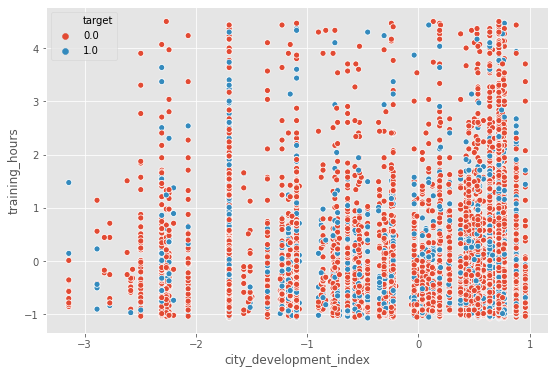

In [165]:
plt.figure(figsize=(9,6))
sns.scatterplot(X_train_new.city_development_index, X_train_new.training_hours, hue=y_train)

In [166]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [167]:
X_train_rs, y_train_rs = oversample.fit_resample(X_train_new, y_train)

In [169]:
X_train_rs.shape

(21778, 12)

In [171]:
y_train_rs.shape

(21778,)

<AxesSubplot:xlabel='city_development_index', ylabel='training_hours'>

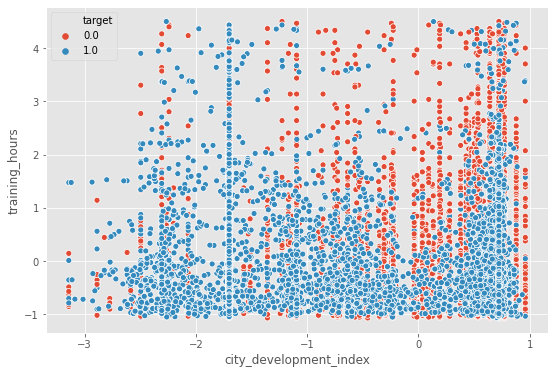

In [173]:
plt.figure(figsize=(9,6))
sns.scatterplot(X_train_rs.city_development_index, X_train_rs.training_hours, hue=y_train_rs)

<AxesSubplot:xlabel='target', ylabel='count'>

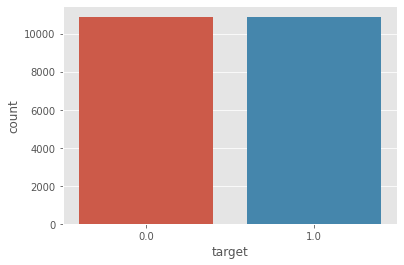

In [174]:
sns.countplot(y_train_rs)

In [175]:
# The data is balanced

In [176]:
X_train_rs.shape

(21778, 12)

In [177]:
y_train_rs.shape

(21778,)

In [178]:
X_test_new.shape

(3603, 12)

In [179]:
y_test.shape

(3603,)

In [180]:
# Lets train a simple Logistic regression model

# Model1: Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
model1 = LogisticRegression()

In [183]:
model1.fit(X_train_rs, y_train_rs)

LogisticRegression()

In [184]:
y_pred = model1.predict(X_test_new)

In [185]:
y_pred

array([0., 0., 1., ..., 0., 0., 1.])

In [187]:
y_test.values

array([0., 1., 0., ..., 0., 0., 0.])

### Model evaluation

#### accuracy

In [189]:
from sklearn.metrics import accuracy_score
model1_acc = accuracy_score(y_test,y_pred)
model1_acc

0.7152373022481265

#### classification report

In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.74      0.80      2704
         1.0       0.45      0.64      0.53       899

    accuracy                           0.72      3603
   macro avg       0.66      0.69      0.66      3603
weighted avg       0.76      0.72      0.73      3603



# Model2 : Random Forest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
model2 = RandomForestClassifier(n_estimators=500)

In [193]:
model2.fit(X_train_rs, y_train_rs)

RandomForestClassifier(n_estimators=500)

In [194]:
y_pred = model2.predict(X_test_new)

In [195]:
y_pred

array([0., 1., 0., ..., 0., 0., 1.])

In [196]:
y_test.values

array([0., 1., 0., ..., 0., 0., 0.])

### Model evaluation

#### accuracy

In [198]:
model2_acc = accuracy_score(y_test, y_pred)
model2_acc

0.7030252567305023

In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      2704
         1.0       0.41      0.43      0.42       899

    accuracy                           0.70      3603
   macro avg       0.61      0.61      0.61      3603
weighted avg       0.71      0.70      0.71      3603



# Model3 : Support Vector Machine

In [200]:
from sklearn.svm import SVC

In [201]:
model3 = SVC()

In [202]:
model3.fit(X_train_rs, y_train_rs)

SVC()

In [203]:
y_pred = model3.predict(X_test_new)

In [204]:
y_pred

array([0., 0., 1., ..., 0., 0., 1.])

In [205]:
y_test.values

array([0., 1., 0., ..., 0., 0., 0.])

### Model evaluation

#### accuracy

In [206]:
model3_acc = accuracy_score(y_test, y_pred)
model3_acc

0.7246738828753816

#### classification report

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80      2704
         1.0       0.46      0.65      0.54       899

    accuracy                           0.72      3603
   macro avg       0.66      0.70      0.67      3603
weighted avg       0.76      0.72      0.74      3603



# Model comparison

In [208]:
mc = {
    'model' : ['LogisticRegression', 'RandomForest', 'SupportVectorMachine'],
    'accuracy' : [model1_acc, model2_acc, model3_acc]
}
mc = pd.DataFrame(mc)
mc

,model,accuracy
0,LogisticRegression,0.715237
1,RandomForest,0.703025
2,SupportVectorMachine,0.724674


In [209]:
# Support Vector Machine gives the highest accuracy of 72%